<a href="https://colab.research.google.com/github/PriyanshuR23/Industrial_IOT_Predictive_Maintenance/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Load dataset from GitHub
url = "https://media.githubusercontent.com/media/somjit101/Predictive-Maintenance-Industrial-IOT/refs/heads/main/sensor.csv"
df = pd.read_csv(url)

# Display first few rows
df.head()

,ID,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,machine_status,timestamp
0,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:00
1,2,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,0,01-04-18 0:01
2,3,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,0,01-04-18 0:02
3,4,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,0,01-04-18 0:03
4,5,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,0,01-04-18 0:04


In [2]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220313 entries, 0 to 220312
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              220313 non-null  int64  
 1   sensor_00       210105 non-null  float64
 2   sensor_01       219944 non-null  float64
 3   sensor_02       220294 non-null  float64
 4   sensor_03       220294 non-null  float64
 5   sensor_04       220294 non-null  float64
 6   sensor_05       220294 non-null  float64
 7   sensor_06       215515 non-null  float64
 8   sensor_07       214862 non-null  float64
 9   sensor_08       215206 non-null  float64
 10  sensor_09       215718 non-null  float64
 11  sensor_10       220294 non-null  float64
 12  sensor_11       220294 non-null  float64
 13  sensor_12       220294 non-null  float64
 14  sensor_13       220294 non-null  float64
 15  sensor_14       220292 non-null  float64
 16  sensor_15       220282 non-null  float64
 17  sensor_16 

,0
ID,0
sensor_00,10208
sensor_01,369
sensor_02,19
sensor_03,19
sensor_04,19
sensor_05,19
sensor_06,4798
sensor_07,5451
sensor_08,5107



Histograms for each numerical feature:


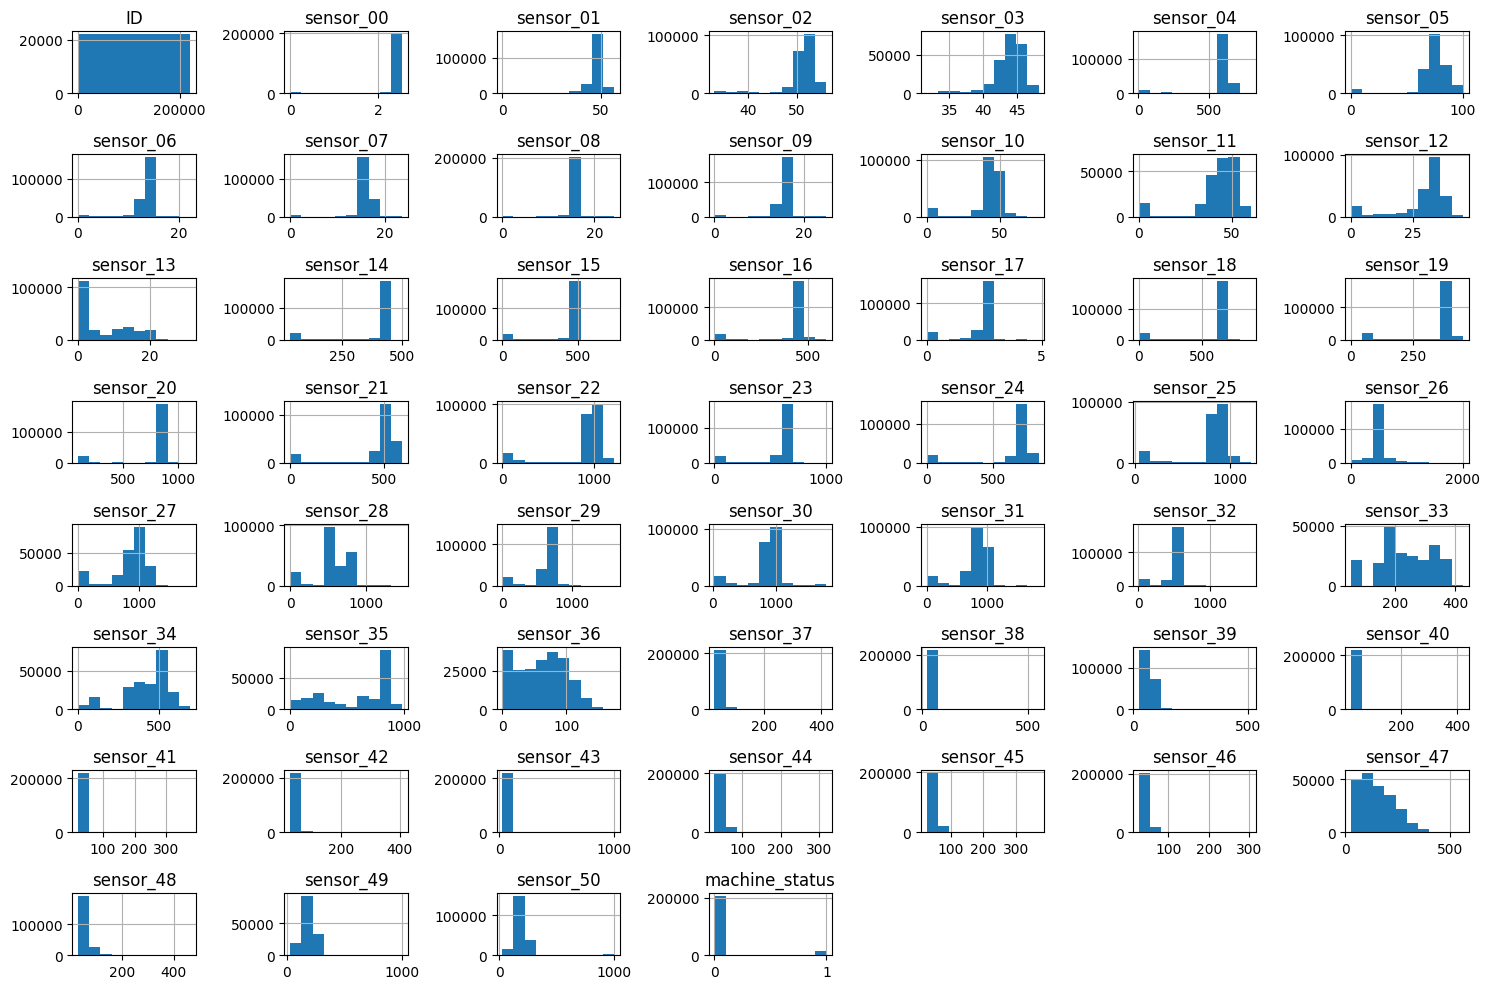

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns # Plot histograms for each numerical feature

print("\nHistograms for each numerical feature:")
# Exclude non-numeric columns from the histogram
numeric_df = df.select_dtypes(include=['number'])
numeric_df.hist(figsize=(15, 10))

plt.tight_layout()
plt.show()



Correlation matrix:


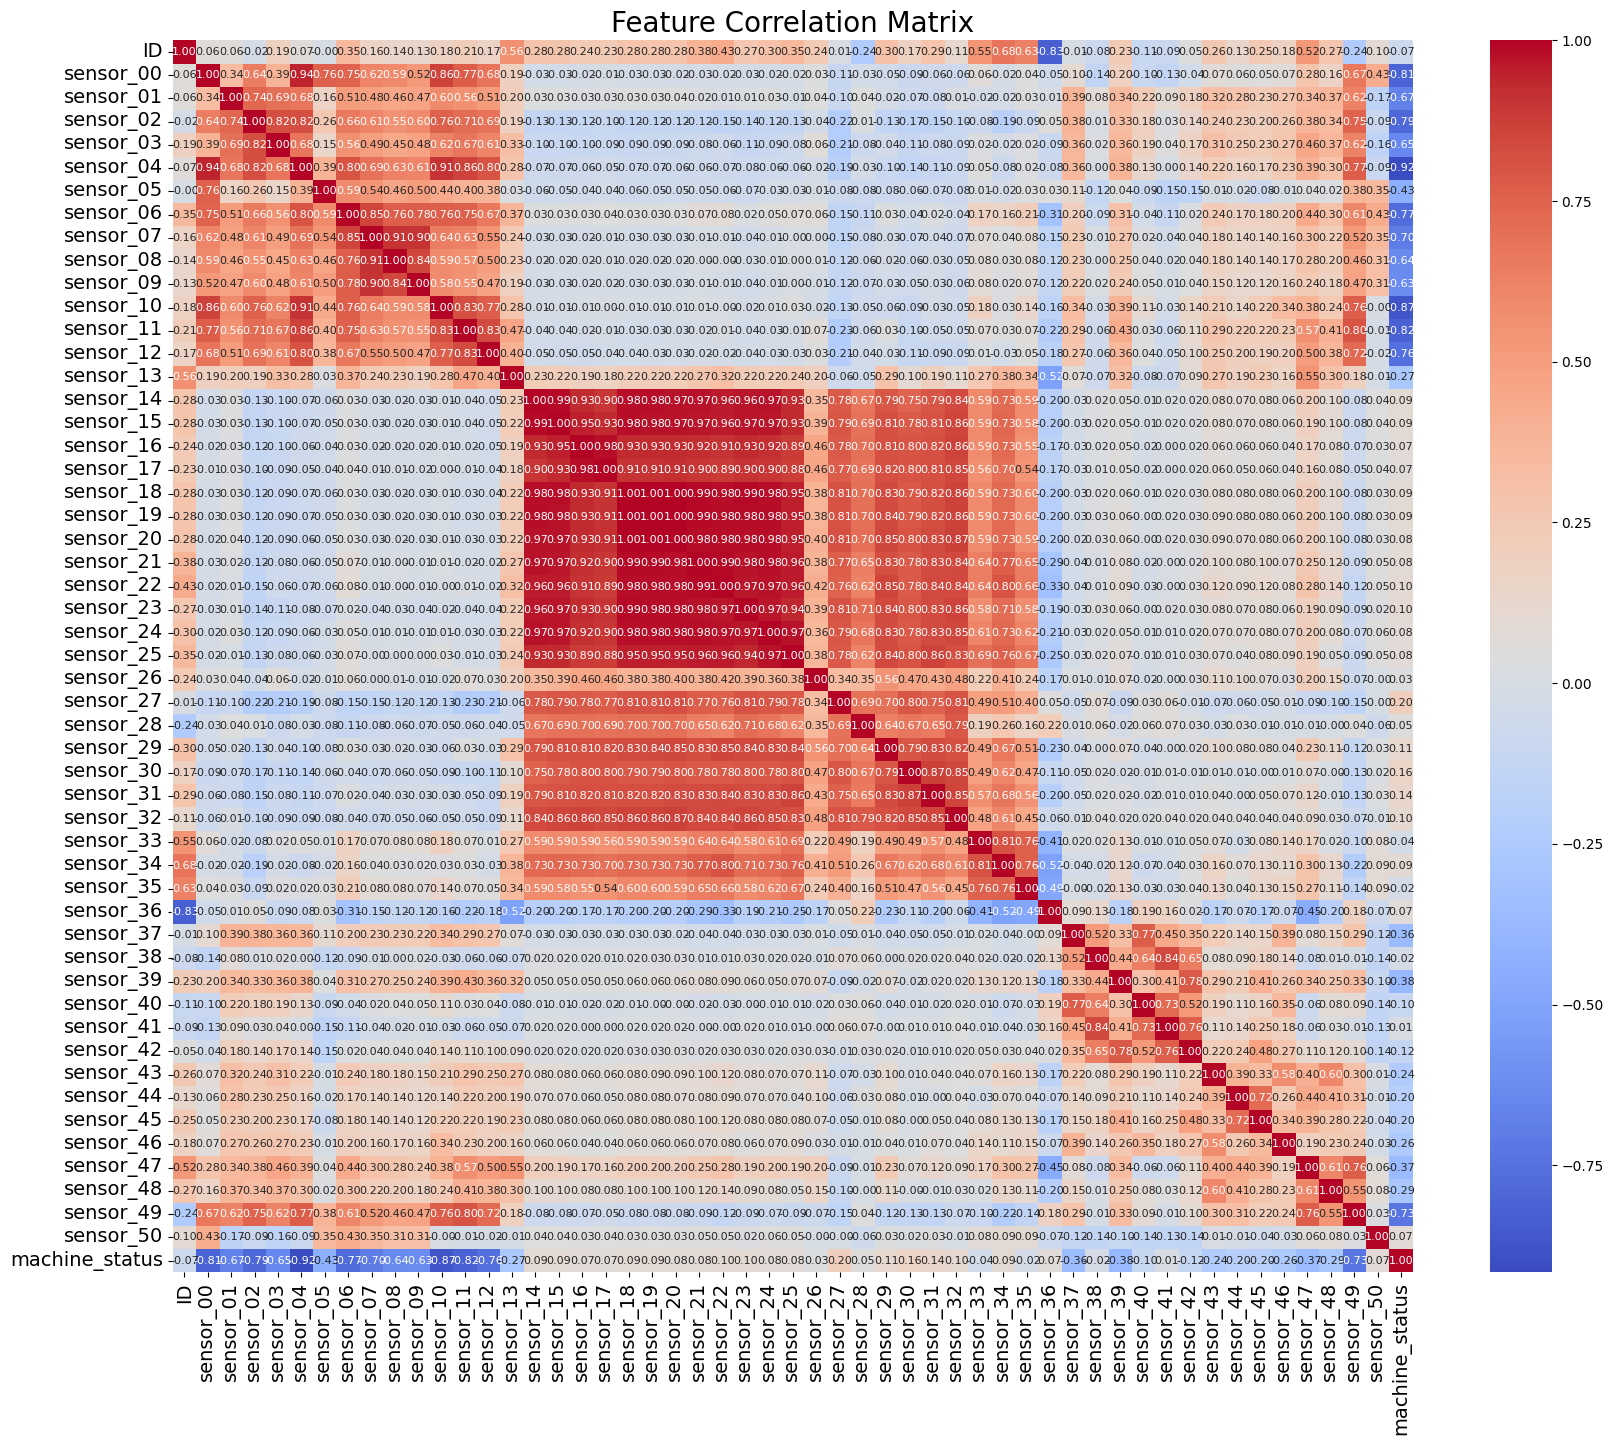

In [10]:
# Plot correlation matrix
print('\nCorrelation matrix:')
# Exclude non-numeric columns from the correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(20, 16))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})  # Keep font size for annotations small
plt.title("Feature Correlation Matrix", fontsize=20)  # Increase font size for title
plt.xticks(fontsize=14)  # Increase font size for x-axis labels
plt.yticks(fontsize=14)  # Increase font size for y-axis labels
plt.show()

In [14]:
# Identify key variables and metrics
# For demonstration, we will simply list the column names
print("\nColumn names in the dataset:")
print(df.columns)

# Understand the data types
print("\nData types of the columns:")
print(df.dtypes)



Column names in the dataset:
Index(['ID', 'sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_50', 'machine_status', 'timestamp'],
      dtype='object')

Data types of the columns:
ID                  int64
sensor_00         float64
sensor_01         float64
sensor_02         float64
sensor_03         float64
sensor_04   


Distribution plots for selected features:


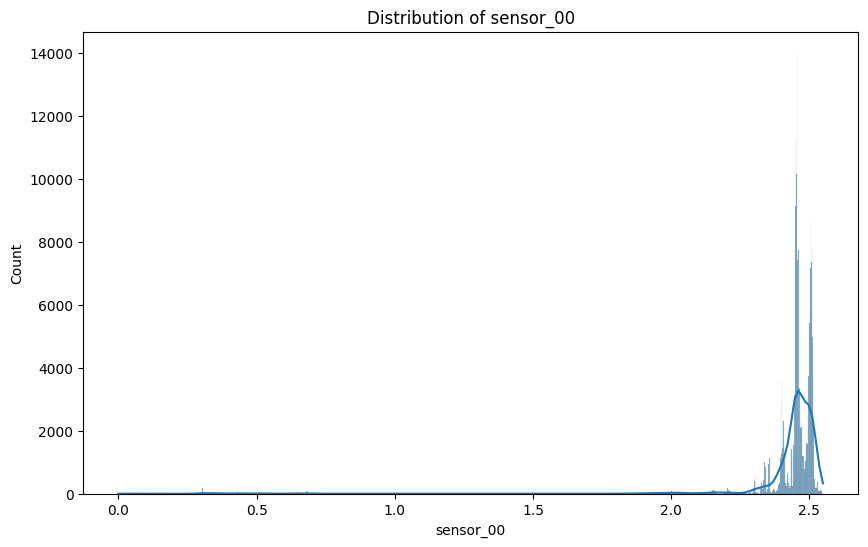

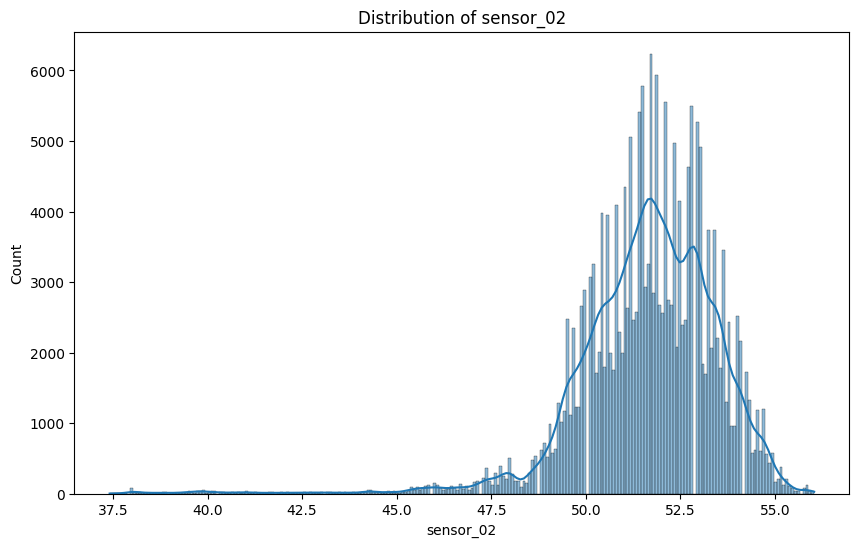

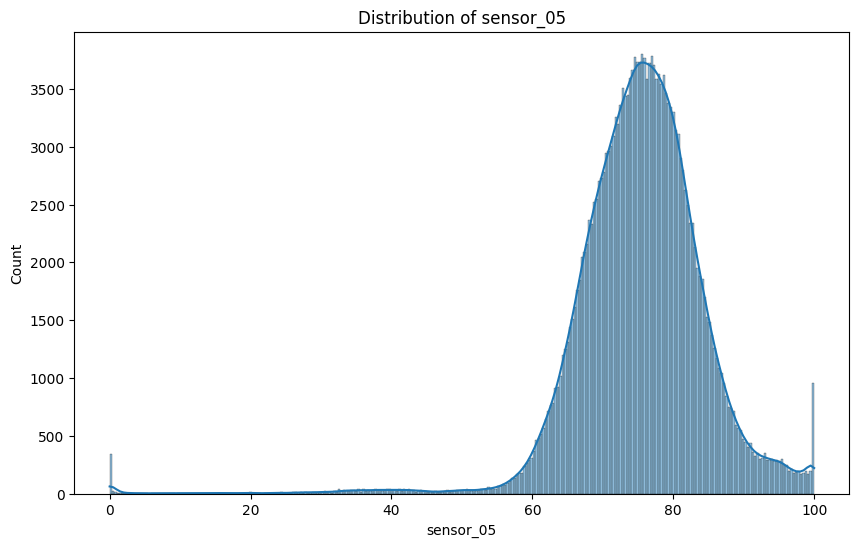

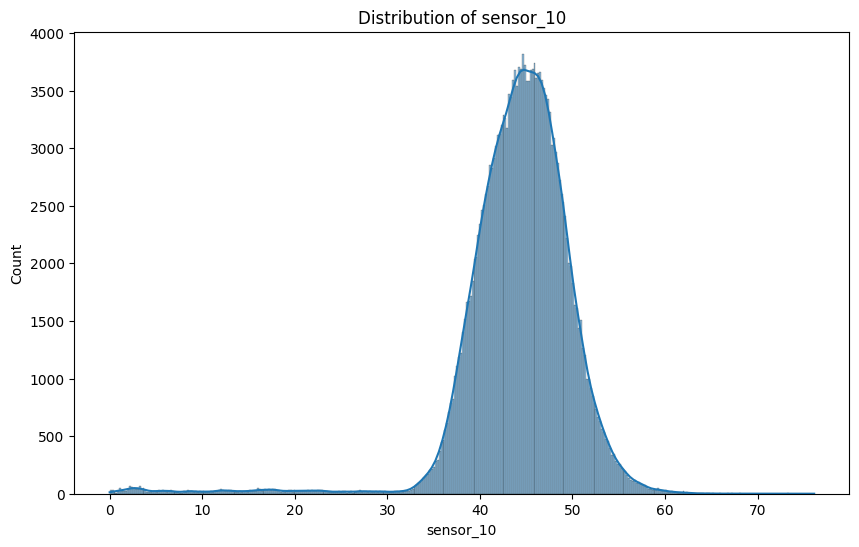

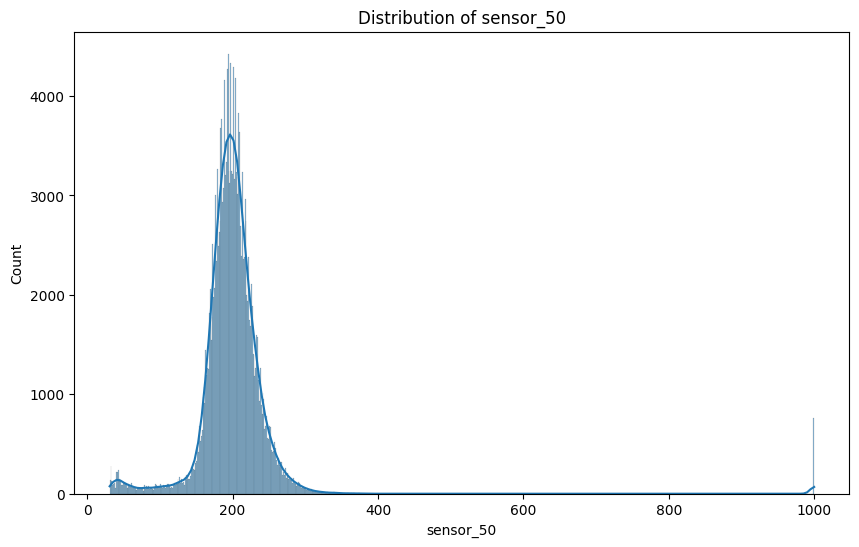

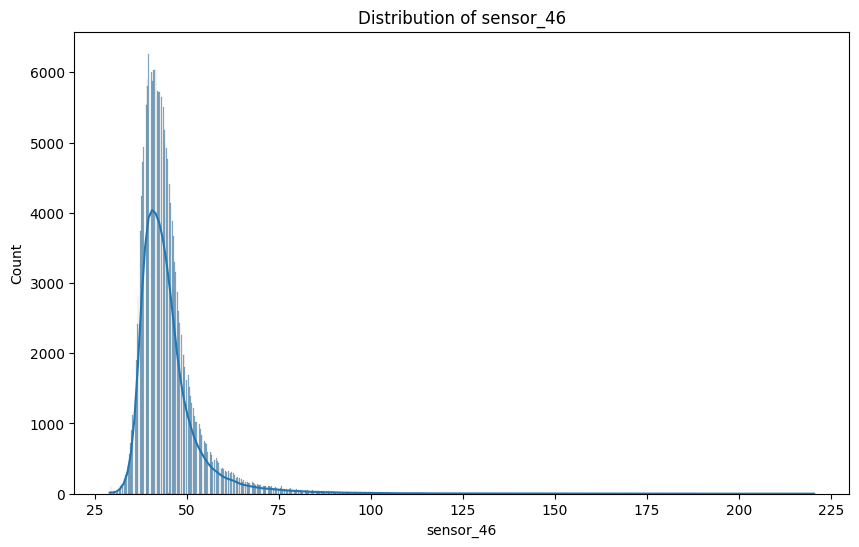

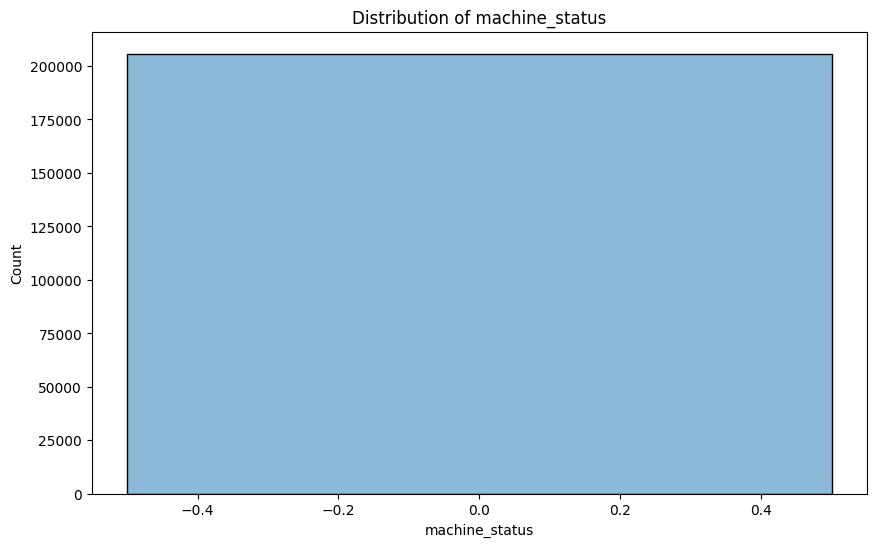

In [18]:
# # Check the distribution of each feature
# print("\nDistribution plots for each feature:")
# for column in df.select_dtypes(include=['float64', 'int64']).columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df[column], kde=True)
#     plt.title(f'Distribution of {column}')
#     plt.show()


#distribution of randomly selected seasors feature
dis_selected_sensors = ['sensor_00', 'sensor_02', 'sensor_05', 'sensor_10', 'sensor_50', 'sensor_46','machine_status']

print("\nDistribution plots for selected features:")
for column in dis_selected_sensors:
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
    else:
        print(f"Column {column} not found in the dataset.")

In [54]:
# prompt: Normalize/Standardize Data
# Normalize or standardize the data to ensure consistency without losing meaning.
# also remove the outliner_flag column

import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
url = "https://media.githubusercontent.com/media/somjit101/Predictive-Maintenance-Industrial-IOT/refs/heads/main/sensor.csv"
df = pd.read_csv(url)
# Assuming 'df' is your DataFrame and it includes 'outlier_flag'
# Remove the 'outlier_flag' column if it exists
if 'outlier_flag' in df.columns:
    df = df.drop('outlier_flag', axis=1)

# Separate numerical and categorical features
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

# Normalize numerical features using MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Alternatively, standardize numerical features using StandardScaler
# scaler = StandardScaler()
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


         ID  sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0  0.000000   0.967194   0.830145   0.876660   0.884816   0.792242   0.764598   
1  0.000005   0.967194   0.830145   0.876660   0.884816   0.792242   0.764598   
2  0.000009   0.959089   0.834736   0.876660   0.890052   0.797904   0.735461   
3  0.000014   0.965264   0.830145   0.874763   0.890052   0.784402   0.769891   
4  0.000018   0.959475   0.830910   0.876660   0.890052   0.794855   0.765891   

   sensor_06  sensor_07  sensor_08  ...  sensor_43  sensor_44  sensor_45  \
0   0.602472   0.683630   0.638905  ...   0.014256   0.133858   0.071489   
1   0.602472   0.683630   0.638905  ...   0.014256   0.133858   0.071489   
2   0.598568   0.679645   0.640988  ...   0.013959   0.132874   0.072330   
3   0.598243   0.688535   0.644259  ...   0.013662   0.130905   0.072330   
4   0.599870   0.687002   0.644259  ...   0.013365   0.131890   0.074012   

   sensor_46  sensor_47  sensor_48  sensor_49  sensor_50

Explained Variance Ratio:
[5.52514473e-01 1.65954152e-01 7.48952978e-02 3.80894385e-02
 2.56512358e-02 1.50464455e-02 1.49357813e-02 1.25574945e-02
 1.21268860e-02 1.03899673e-02 8.06580055e-03 7.46760131e-03
 6.95924820e-03 6.01836255e-03 5.54454106e-03 4.69620831e-03
 4.35298840e-03 3.65800447e-03 3.47195699e-03 3.12872473e-03
 2.72680419e-03 2.08444353e-03 1.96969688e-03 1.65955862e-03
 1.53116858e-03 1.42156448e-03 1.38394248e-03 1.37514001e-03
 1.26389961e-03 1.05713680e-03 9.92419446e-04 7.81404928e-04
 7.29559203e-04 6.45897535e-04 6.33578459e-04 6.09360385e-04
 5.80645143e-04 5.27142862e-04 5.12262327e-04 3.75834762e-04
 3.15860125e-04 2.82900948e-04 2.42214269e-04 2.30315743e-04
 1.77795486e-04 1.33126619e-04 6.34008034e-05 5.24811465e-05
 4.70281185e-05 4.05112907e-05]

Cumulative Explained Variance:
[0.55251447 0.71846862 0.79336392 0.83145336 0.8571046  0.87215104
 0.88708682 0.89964432 0.9117712  0.92216117 0.93022697 0.93769457
 0.94465382 0.95067218 0.95621673 0.96091293

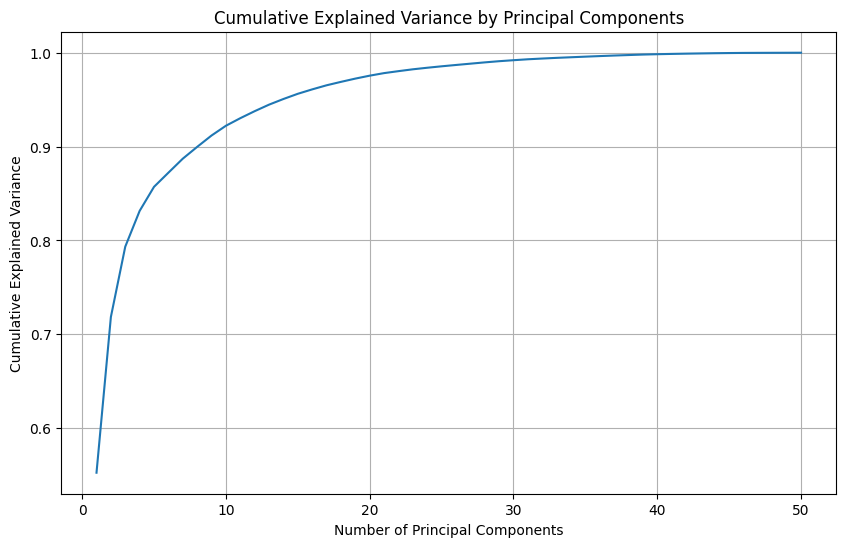


Principal Component DataFrame:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.006830  0.002069 -0.535294  0.121840  0.047336 -0.145986 -0.095006   
1  0.006830  0.002069 -0.535294  0.121840  0.047336 -0.145986 -0.095006   
2  0.018813  0.008770 -0.553382  0.137046  0.020487 -0.132146 -0.084644   
3  0.009908  0.005442 -0.578322  0.113661  0.039800 -0.108470 -0.070298   
4  0.011865  0.016306 -0.590153  0.114570  0.028894 -0.112801 -0.066934   

        PC8       PC9      PC10  ...      PC41      PC42      PC43      PC44  \
0 -0.069246 -0.179795  0.098458  ...  0.034640 -0.001509 -0.009826 -0.010892   
1 -0.069246 -0.179795  0.098458  ...  0.034640 -0.001509 -0.009826 -0.010892   
2 -0.057341 -0.153303  0.097866  ...  0.033525 -0.002811 -0.008789 -0.010674   
3 -0.043469 -0.158797  0.110117  ...  0.034112 -0.003675 -0.008138 -0.008108   
4 -0.051024 -0.160462  0.101405  ...  0.036939  0.002790 -0.006815 -0.004983   

       PC45      PC46      PC47     

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming 'df' is your DataFrame with normalized numerical features
# Select only the sensor columns for PCA
sensor_columns = [col for col in df.columns if 'sensor' in col]
sensor_data = df[sensor_columns]

# Impute missing values using SimpleImputer before applying PCA
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of each column
sensor_data_imputed = imputer.fit_transform(sensor_data) # Apply imputation

# Apply PCA
pca = PCA(n_components=50) # Reduce to 50 principal components
principal_components = pca.fit_transform(sensor_data_imputed) # Use imputed data for PCA

# Create a new DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(50)])


# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_variance)

# Plotting the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Print the principal component DataFrame
print("\nPrincipal Component DataFrame:")
print(principal_df.head())

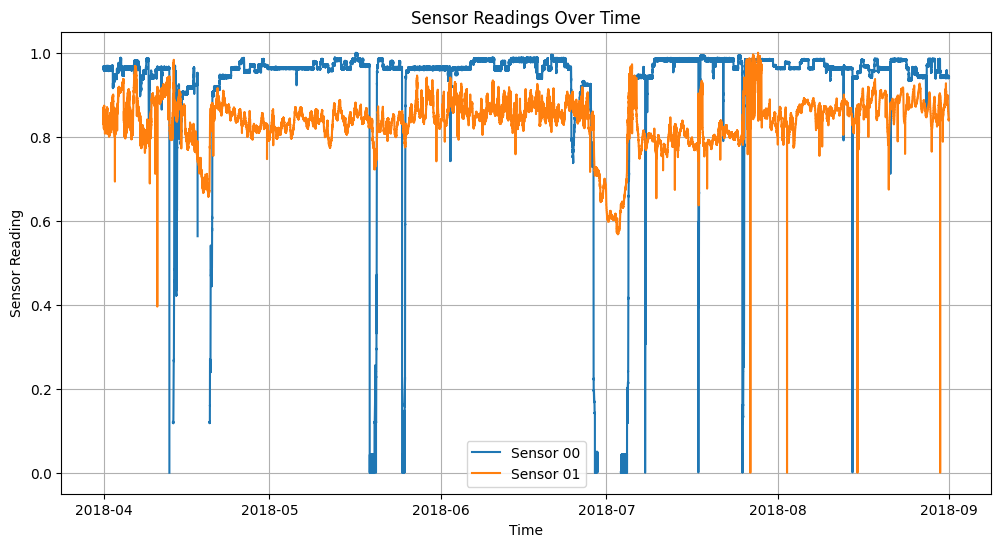

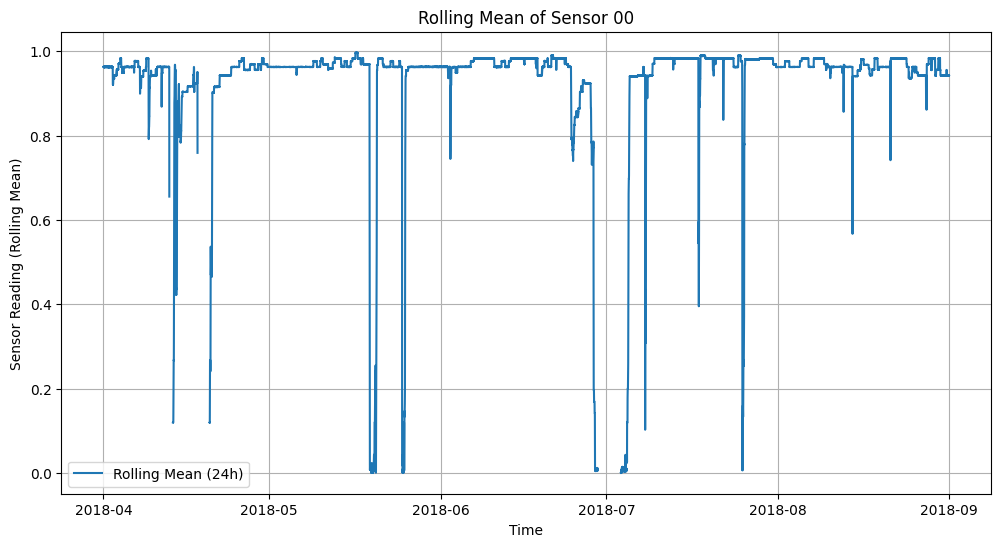

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


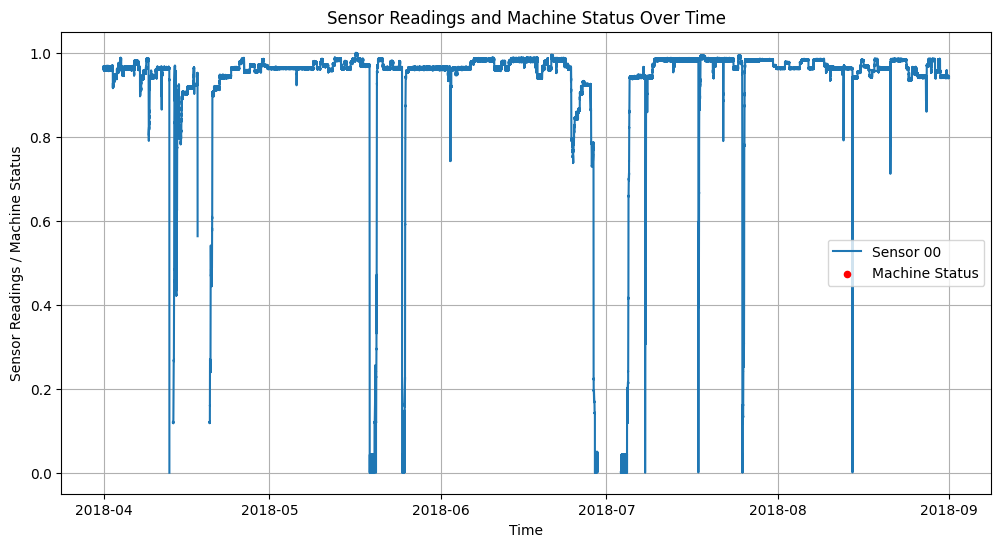

In [56]:
# prompt: Plot Graphs that show values that can be utilized in Predictive maintenance , timestamp exists in the last column in this format "01-04-18 0:00"

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and the timestamp column is named 'timestamp'
# and is in the last column as specified.  If not, replace 'df.columns[-1]' with
# the actual column name.

# Convert the timestamp column to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%m-%y %H:%M')

# Set the timestamp column as the index
df = df.set_index('timestamp')


# Example 1: Plot sensor readings over time
plt.figure(figsize=(12, 6))
plt.plot(df['sensor_00'], label='Sensor 00')  # Replace with relevant sensor columns
plt.plot(df['sensor_01'], label='Sensor 01')  # Replace with relevant sensor columns
plt.xlabel('Time')
plt.ylabel('Sensor Reading')
plt.title('Sensor Readings Over Time')
plt.legend()
plt.grid(True)
plt.show()


# Example 2: Plot rolling mean of a specific sensor
plt.figure(figsize=(12, 6))
plt.plot(df['sensor_00'].rolling(window=24).mean(), label='Rolling Mean (24h)') # Example rolling mean
plt.xlabel('Time')
plt.ylabel('Sensor Reading (Rolling Mean)')
plt.title('Rolling Mean of Sensor 00')
plt.legend()
plt.grid(True)
plt.show()


# Example 3: Plot sensor readings and machine status over time
# Assuming 'machine_status' column exists and can be mapped to numerical values

# Map 'machine_status' to numerical values if needed
status_mapping = {'NORMAL': 0, 'BROKEN': 1, 'RECOVERING': 2} # Example mapping
df['machine_status_numeric'] = df['machine_status'].map(status_mapping)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['sensor_00'], label='Sensor 00')
plt.scatter(df.index, df['machine_status_numeric'], color='red', label='Machine Status', s=20)  # Smaller marker size
plt.xlabel('Time')
plt.ylabel('Sensor Readings / Machine Status')
plt.title('Sensor Readings and Machine Status Over Time')
plt.legend()
plt.grid(True)
plt.show()
